# I.  Text Cleaning and Preparation:  Introduction

Put some text here

# II.  Setup the Environment

We'll focus on usingthe NLTK package to clean and process our text for final analysis.  Comments in the code identify each of the packages being loaded.  In each case, you can refer to the package documentation for more specific information about the package being used.  You must run the code cells below to properly prepare your environment to perfrom the text mining and analysis tasks presented in this module.

In [ ]:
# update collab environment to latest version of NLTK
# documentation: https://www.nltk.org/
!pip install nltk -U

In [144]:
# import the base nltk package
import nltk

# load the nltk tokenize module
from nltk.tokenize import word_tokenize

# download the punkt model
nltk.download('punkt')

# import nltk stopword module
from nltk.corpus import stopwords

# donload the stopword list
nltk.download('stopwords')

# import the nltk porter stemmer
from nltk.stem.porter import PorterStemmer

# import the nltk lemmatizer
from nltk.stem import WordNetLemmatizer

# download nltk wordnet model
nltk.download('wordnet')

# import the regular expressions package
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# III.  Load the Text File

In [3]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


In [4]:
working_file_path = "/gdrive/MyDrive/rbs_digital_approaches_2021/data_class/melville.txt"

Now that you've defined a file to load, we can open the file and read its contents into a string variable.

In [60]:
# open a text file for processing
working_file = open(working_file_path, "r")

# read the file contents into a string variable
working_text = working_file.read()

You can check that your file loaded by checking the length and examining the opening characters of the working_text variable.

In [6]:
# print the character length of our working text
print('Characters in string:', len(working_text))

Characters in string: 1235150


# IV.  Remove Newline Characters and Strip Spaces

In [61]:
# define a pattern for finding newlines
pattern = re.compile(r"\n", re.DOTALL | re.MULTILINE | re.IGNORECASE)
# run the replacement.  
working_text = re.sub(pattern, " ", working_text)

In [62]:
# define a patern for finding multiple spaces
pattern = re.compile(r"\s+")
# run the replacement
working_text = re.sub(pattern, " ", working_text)

In [63]:
# strip leading and trailing spaces
working_text = working_text.strip()

# IV. Remove Editorial Text

In [105]:
# look at the first 600 characters of the string
print(len(working_text))
print(working_text[119000:1190046:1])

1190046
long the people stared; not at Queequeg so much--for they were used to seeing cannibals like him in their streets,--but at seeing him and me upon such confidential terms. But we heeded them not, going along wheeling the barrow by turns, and Queequeg now and then stopping to adjust the sheath on his harpoon barbs. I asked him why he carried such a troublesome thing with him ashore, and whether all whaling ships did not find their own harpoons. To this, in substance, he replied, that though what I hinted was true enough, yet he had a particular affection for his own harpoon, because it was of assured stuff, well tried in many a mortal combat, and deeply intimate with the hearts of whales. In short, like many inland reapers and mowers, who go into the farmers' meadows armed with their own scythes--though in no wise obliged to furnish them--even so, Queequeg, for his own private reasons, preferred his own harpoon. Shifting the barrow from my hand to his, he told me a funny story ab

In [99]:
# define a pattern and remove the opening text
pattern = re.compile(r"^.*chapter 1\. Loomings\.?", re.IGNORECASE)
working_text = re.sub(pattern, "", working_text)

In [102]:
# define a pattern and remove the closing text
pattern = re.compile(r"End of Project Gutenberg's.*", re.IGNORECASE)
working_text = re.sub(pattern, "", working_text)

# V. Save Clean Blob Version

In [106]:
blob_text = working_text

# For the rest of the cleaning we'll tokenize and then clean because NLTK Likes it that way

In [113]:
# tokenize on words
tokens = word_tokenize(working_text)


In [120]:
print(tokens[:10])

['call', 'me', 'ishmael', '.', 'some', 'years', 'ago', '--', 'never', 'mind']


In [117]:
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
filtered_tokens = [w.translate(table) for w in tokens]

In [121]:
print(filtered_tokens[:10])

['call', 'me', 'ishmael', '', 'some', 'years', 'ago', '', 'never', 'mind']


In [ ]:
# remove remaining tokens that are not alphabetic
filtered_tokens = [word for word in filtered_tokens if word.isalpha()]

In [124]:
print(filtered_tokens[:10])

['call', 'me', 'ishmael', 'some', 'years', 'ago', 'never', 'mind', 'how', 'long']


In [129]:
# load the nltp stopword list
stop_words = set(stopwords.words('english'))


In [131]:
print(stop_words)

{'no', 'we', "aren't", 'himself', 'are', 'if', 'him', "won't", 'y', 'ourselves', 'nor', 'my', "you'd", 'before', 'weren', 'd', 'not', 'shouldn', 've', "weren't", 'that', 'such', 'until', 'was', 'do', 'they', 'in', 'should', "should've", 'didn', 'being', 'as', 'than', "didn't", 'will', 'and', 'with', 'below', "mustn't", 'few', 'doing', 'our', 'other', "needn't", 'be', "shan't", "shouldn't", 'while', 't', 'just', 'wasn', 'whom', 're', 'about', 'between', 'it', 'of', 'above', 'more', "you'll", 'during', "hadn't", 'a', 'o', 'very', 'yours', 'into', 'you', "isn't", "she's", 'too', 'mightn', 'i', 'those', "doesn't", 'here', "don't", 'up', "you've", 'theirs', 'down', 'myself', 'now', "couldn't", 'after', 'the', 'she', 'this', 'having', 'from', 'when', 'own', 'don', 'won', 'because', 'her', 'but', 'them', 'there', 'isn', 'needn', 'can', 'me', 'aren', 'both', 'their', 'll', "haven't", 's', "wasn't", 'through', 'where', "hasn't", 'which', 'its', 'hers', 'then', 'once', 'shan', 'ain', 'at', 'why'

Note that based on your research qustion you might want to modify the stopword list

In [132]:
# remove the stopwords
filtered_tokens = [w for w in filtered_tokens if not w in stop_words]

In [134]:
print(filtered_tokens[:10])

['call', 'ishmael', 'years', 'ago', 'never', 'mind', 'long', 'precisely', 'little', 'money']


# Stemming and Lemmatizing



In [137]:
# instantiate a porter stemmer class object
p_stemmer = PorterStemmer()

#  run the stemmer on our list of filtered words
stemmed_tokens = [p_stemmer.stem(word) for word in filtered_tokens]

In [138]:
print(stemmed_tokens[:100])

['call', 'ishmael', 'year', 'ago', 'never', 'mind', 'long', 'precis', 'littl', 'money', 'purs', 'noth', 'particular', 'interest', 'shore', 'thought', 'would', 'sail', 'littl', 'see', 'wateri', 'part', 'world', 'way', 'drive', 'spleen', 'regul', 'circul', 'whenev', 'find', 'grow', 'grim', 'mouth', 'whenev', 'damp', 'drizzli', 'novemb', 'soul', 'whenev', 'find', 'involuntarili', 'paus', 'coffin', 'warehous', 'bring', 'rear', 'everi', 'funer', 'meet', 'especi', 'whenev', 'hypo', 'get', 'upper', 'hand', 'requir', 'strong', 'moral', 'principl', 'prevent', 'deliber', 'step', 'street', 'method', 'knock', 'peopl', 'hat', 'account', 'high', 'time', 'get', 'sea', 'soon', 'substitut', 'pistol', 'ball', 'philosoph', 'flourish', 'cato', 'throw', 'upon', 'sword', 'quietli', 'take', 'ship', 'noth', 'surpris', 'knew', 'almost', 'men', 'degre', 'time', 'cherish', 'nearli', 'feel', 'toward', 'ocean', 'insular', 'citi', 'manhatto']


In [142]:
# instantiate a wordnet lemmatizer class
lemmatizer = WordNetLemmatizer()

In [153]:
thislem = lemmatizer.lemmatize("driving")

In [154]:
print(thislem)

driving


We'll now loop through each word in our list of filtered tokens, lookup its stemmed root and add that to list of stemmed tokens.

In [149]:
# instanitate an empty list to hold our stemmed tokens
lemmatized_tokens = []
# now loop through our filtered token list
for word in filtered_tokens:
  # adappend lemma of each word to lemma list
  lemmatized_tokens.append(lemmatizer.lemmatize(word))

In [152]:
print(lemmatized_tokens[:100])

['call', 'ishmael', 'year', 'ago', 'never', 'mind', 'long', 'precisely', 'little', 'money', 'purse', 'nothing', 'particular', 'interest', 'shore', 'thought', 'would', 'sail', 'little', 'see', 'watery', 'part', 'world', 'way', 'driving', 'spleen', 'regulating', 'circulation', 'whenever', 'find', 'growing', 'grim', 'mouth', 'whenever', 'damp', 'drizzly', 'november', 'soul', 'whenever', 'find', 'involuntarily', 'pausing', 'coffin', 'warehouse', 'bringing', 'rear', 'every', 'funeral', 'meet', 'especially', 'whenever', 'hypo', 'get', 'upper', 'hand', 'requires', 'strong', 'moral', 'principle', 'prevent', 'deliberately', 'stepping', 'street', 'methodically', 'knocking', 'people', 'hat', 'account', 'high', 'time', 'get', 'sea', 'soon', 'substitute', 'pistol', 'ball', 'philosophical', 'flourish', 'cato', 'throw', 'upon', 'sword', 'quietly', 'take', 'ship', 'nothing', 'surprising', 'knew', 'almost', 'men', 'degree', 'time', 'cherish', 'nearly', 'feeling', 'towards', 'ocean', 'insular', 'city', 

In [155]:
print(filtered_tokens[:100])

['call', 'ishmael', 'years', 'ago', 'never', 'mind', 'long', 'precisely', 'little', 'money', 'purse', 'nothing', 'particular', 'interest', 'shore', 'thought', 'would', 'sail', 'little', 'see', 'watery', 'part', 'world', 'way', 'driving', 'spleen', 'regulating', 'circulation', 'whenever', 'find', 'growing', 'grim', 'mouth', 'whenever', 'damp', 'drizzly', 'november', 'soul', 'whenever', 'find', 'involuntarily', 'pausing', 'coffin', 'warehouses', 'bringing', 'rear', 'every', 'funeral', 'meet', 'especially', 'whenever', 'hypos', 'get', 'upper', 'hand', 'requires', 'strong', 'moral', 'principle', 'prevent', 'deliberately', 'stepping', 'street', 'methodically', 'knocking', 'people', 'hats', 'account', 'high', 'time', 'get', 'sea', 'soon', 'substitute', 'pistol', 'ball', 'philosophical', 'flourish', 'cato', 'throws', 'upon', 'sword', 'quietly', 'take', 'ship', 'nothing', 'surprising', 'knew', 'almost', 'men', 'degree', 'time', 'cherish', 'nearly', 'feelings', 'towards', 'ocean', 'insular', 'c

# VI. Convert to Lowercase

In [107]:
working_text = working_text.lower()

In [108]:
# look at the first 200 characters of the string
print(working_text[0:200:1])

 call me ishmael. some years ago--never mind how long precisely--having little or no money in my purse, and nothing particular to interest me on shore, i thought i would sail about a little and see th


# VIII. Remove Punctuation

# V.  Chunking and Tokenizing

First, let's do some chunking.  **Chunking** (yes, that's the real, technical term) is a process of breaking a text into constituent parts, each of which is called a **token**.  Here, we'll perform two types of chunking:  Sentence and Word.

We'll begin by chunking the text into sentence tokens.  Note that, while this is primarly a module on text minging and analysis, sentnce chunking is actually a Natural Languaghe Processing operation.  Here, the sent_tokenize() function relies on the english language model that we loaded during our environment setup to apply rules for sentence formation and representation in the lanaguage (natural language information) to chunk the text into a list of sentence tokens.

In [ ]:
# tokenize the text by sentence
sent_tokens = sent_tokenize(working_text)

Before we procede, let's look at our sentence tokens to make sure the process worked.

In [ ]:
# print the length of the sent_tokens list
print('Sentences in text:', len(sent_tokens))

Sentences in text: 10099


In [ ]:
# look at the first ten sentences
print(sent_tokens[0:10:1])

['The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman Melville\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.', "You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Moby Dick; or The Whale\n\nAuthor: Herman Melville\n\nLast Updated: January 3, 2009\nPosting Date: December 25, 2008 [EBook #2701]\nRelease Date: June, 2001\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK MOBY DICK; OR THE WHALE ***\n\n\n\n\nProduced by Daniel Lazarus and Jonesey\n\n\n\n\n\nMOBY DICK; OR THE WHALE\n\nBy Herman Melville\n\n\n\n\nOriginal Transcriber's Notes:\n\nThis text is a combination of etexts, one from the now-defunct ERIS\nproject at Virginia Tech and one from Project Gutenberg's archives.", 'The\nproofreaders of this version are indebted to The University of Adelaide\nLibrary for preserving the Virginia 

Now let's also chunk on individual words, creating a list of word tokens.

In [ ]:
# tokenize the text by word
word_tokens = word_tokenize(working_text)

And, again, we'll examine the results of our chunking.

In [ ]:
# print the length of the word_tokens list
print('Words in text:', len(word_tokens))

Words in text: 258660


In [ ]:
# look at an arbitrary selection of words
print(word_tokens[500:1000:10])

['Sub-Sub', 'street-stalls', 'to', ',', 'in', 'statements', 'veritable', 'the', 'here', ',', 'what', 'and', ',', 'poor', '.', 'no', 'for', 'but', 'feel', ';', 'and', '--', 'much', ',', 'go', 'Court', 'your', 'hearts', 'clearing', 'long-pampered', 'coming', 'there', '``', '.', ';', "''", 'a', 'JONAH', 'that', "''", 'Lord', 'sword', 'Leviathan', 'dragon', "''", 'of', ',', 'foul', 'bottomless', 'PLUTARCH']


# VI.  Frequency Distributions

Now that we have out text chunked in a various ways, we can analyze some frequncy distributions of words and parts of speach.  First, we'll create a word distribution.

In [ ]:
# create a frequency distribution
freq_dist = nltk.probability.FreqDist(word_tokens)

In [ ]:
# Look at the most frequent words
print(freq_dist.most_common(n=100))

[(',', 19356), ('the', 13879), ('.', 7562), ('of', 6625), ('and', 6081), ('a', 4606), ('to', 4590), (';', 4179), ('in', 3963), ('that', 2987), ('his', 2459), ('it', 2213), ('I', 2098), ('!', 1768), ('is', 1747), ('--', 1715), ('with', 1706), ('he', 1652), ('was', 1641), ("''", 1637), ('as', 1630), ("'s", 1592), ('``', 1476), ('all', 1462), ('for', 1437), ('this', 1318), ('at', 1246), ('not', 1193), ('by', 1155), ('but', 1114), ('from', 1069), ('him', 1058), ('be', 1045), ('on', 1014), ('?', 1004), ('so', 915), ('you', 890), ('one', 883), ('whale', 780), ('or', 772), ('have', 767), ('had', 767), ('there', 711), ('But', 703), ('were', 679), ('which', 647), ('now', 645), ('me', 624), ('The', 621), ('their', 612), ('are', 607), ('they', 588), ('an', 586), ('some', 578), ('then', 570), ('my', 564), ('like', 558), ('when', 554), ('upon', 539), ('out', 519), ('into', 519), ('up', 502), ('more', 501), ('Ahab', 495), ('no', 491), ('man', 473), ('them', 471), ('ship', 454), ('what', 437), ('old'

We can also plot our frequency distribution:

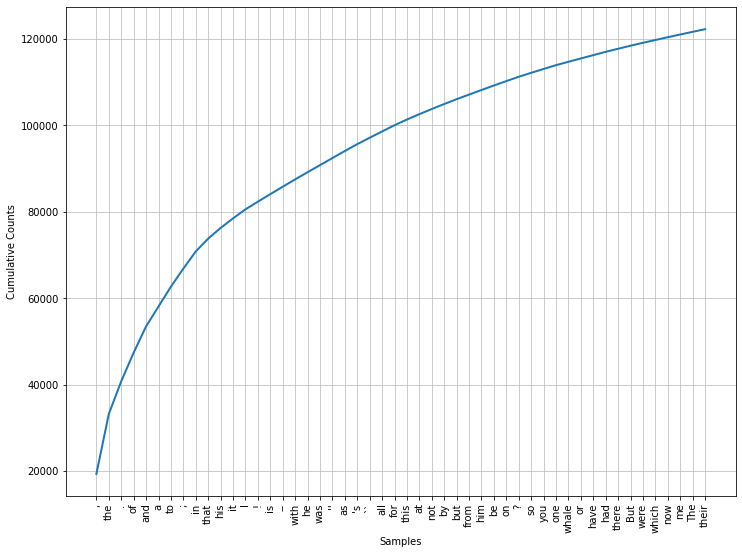

In [ ]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# plot the freqiuency distribution of the top words
freq_dist.plot(50, cumulative=True)

Now that we've dived more deeply into the words in our text, we might want to also take some time to examine particular words of interest.  First, we'll just the count of a particular word.

In [ ]:
# count the occurrences of a word of interest
word_tokens.count('whale')

780

# VII.  Key Word in Context (KWIC)

It can also be useful to examine the context in which particular words appear.  For example, we might have prior knowledge about the importance of a word of interest, or we might have seen something earlier in our analysis that prompts us to want to look deeper into a particuar word.  To accomplish this, we first create a concordance for the text.  A concordance is an index that tracks the location in the text of every occurence of every word.



In [ ]:
# create a condorance obj
obj_concord = nltk.text.ConcordanceIndex(word_tokens)

Once we have a concordance, we can query it for a word of interest and return a desiognated number of characters on either side of each of a designated number of occurrences.

In [ ]:
obj_concord.print_concordance("whale", width=80, lines=25)


Displaying 25 of 780 matches:
t least , take the higgledy-piggledy whale statements , however authentic , in 
e dreadful gulf of this monster 's ( whale 's ) mouth , are immediately lost an
tient Job . '' -- RABELAIS . `` This whale 's liver was two cartloads . '' -- S
 Touching that monstrous bulk of the whale or ork we have received nothing cert
 of oil will be extracted out of one whale . '' -- IBID . `` HISTORY OF LIFE AN
 . '' -- KING HENRY . `` Very like a whale . '' -- HAMLET . `` Which to secure 
restless paine , Like as the wounded whale to shore flies thro ' the maine . ''
t had been a sprat in the mouth of a whale . '' -- PILGRIM 'S PROGRESS . `` Tha
EN 'S ANNUS MIRABILIS . `` While the whale is floating at the stern of the ship
onas-in-the-Whale ... . Some say the whale ca n't open his mouth , but that is 
 masts to see whether they can see a whale , for the first discoverer has a duc
 for his pains ... . I was told of a whale taken near Shetland , that had above
oneers tol

# VIII.  Word Cooccurrence Networks (n-grams)

Let's also take some time to do some preliminary analysis of which words tend to cooccur in the text.  For our preliminary analysis, we'll look only at bi-grams, which are pairs of words that frequently appear next to each other in the text.

In [ ]:
# create a list of bigrams
bigram_list = list(bigrams(word_tokens))

In [ ]:
# create a count of unique bigrams
bigram_counts = collections.Counter(bigram_list)
print(bigram_counts)

Output hidden; open in https://colab.research.google.com to view.

Now that we have a frequency tagged list of bigrams that appear in the text, we can work on plotting a network graph to represent the top bigrams.  We'll do this using the Pandas and Networkx packages.

The Networks package, which we will use to draw the network graph, expects to receive data in the form a a data.frame (a data.frame is spreadsheet like data structure that contains columns, each of which is a field (or variable in statistical language) and rows (each of which represents a single item (or observation in statistical language.  

At present, however, our bigram data is in the form of a list of key/value pairs.  Happily, the Pandas package has functions for creating and working with data.frames, so we'll use Pandas to convert the data into a data.frame and then send that data.frame to Networkx to draw our plot.

In [ ]:
# create an empty pandas DataFrame
bigram_df = pandas.DataFrame(data=None, columns=['source', 'target', 'weight'])


In [ ]:
# add top bigram items to the dataframe
for x, z in bigram_counts.most_common(20):
  bigram_df.loc[len(bigram_df.index)] = [x[0], x[1], z] 

In [ ]:
# create the nodegraph using Networkx
net_graph = networkx.from_pandas_edgelist(bigram_df, source='source', target='target', edge_attr='weight')

And now we're ready to draw the plot to screen.

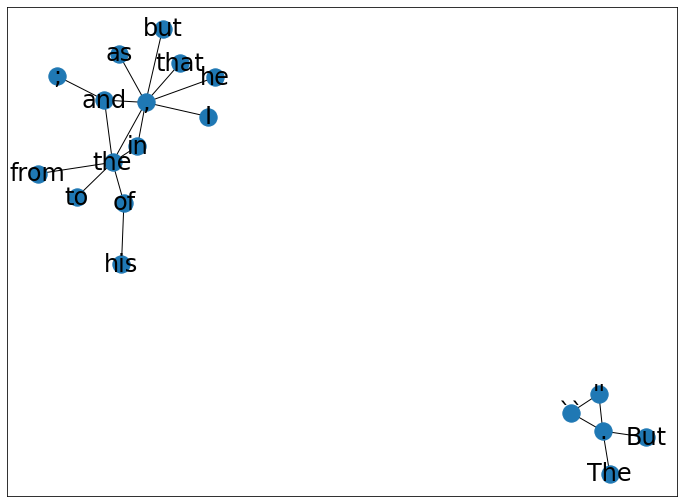

In [ ]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# draw the graph as a force directed graph
networkx.draw_networkx(net_graph, with_labels=True, font_size=24)

We can also draw the network as a circular rather than force directed graph.

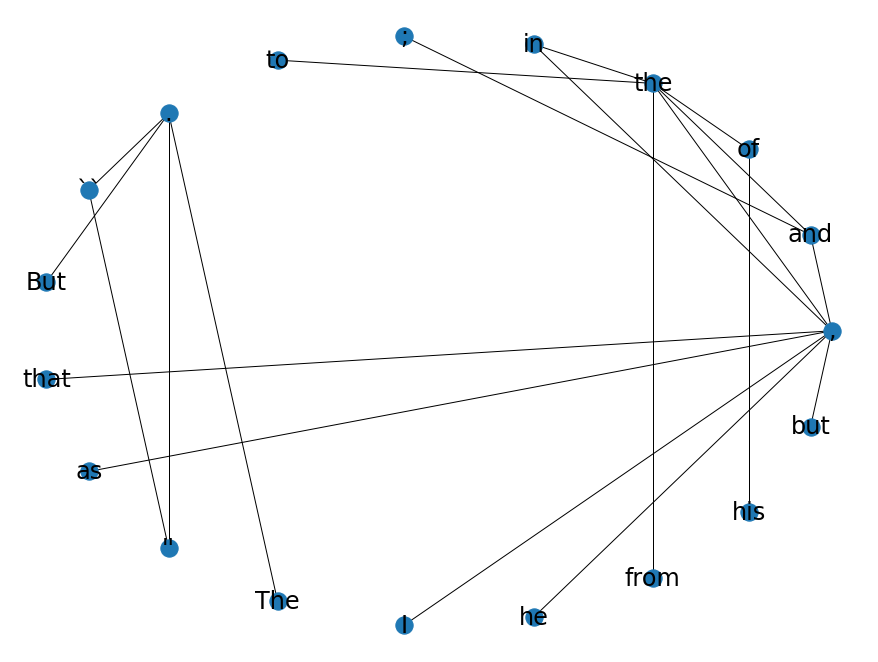

In [ ]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# draw the graph as a circular graph
networkx.draw_circular(net_graph, with_labels=True, font_size=24)

# IX. Word Occurrence Dispersion Plot

We can also plot the disperson word occurence across the narrative time of the text.  This allows us to see how different words function in the text.

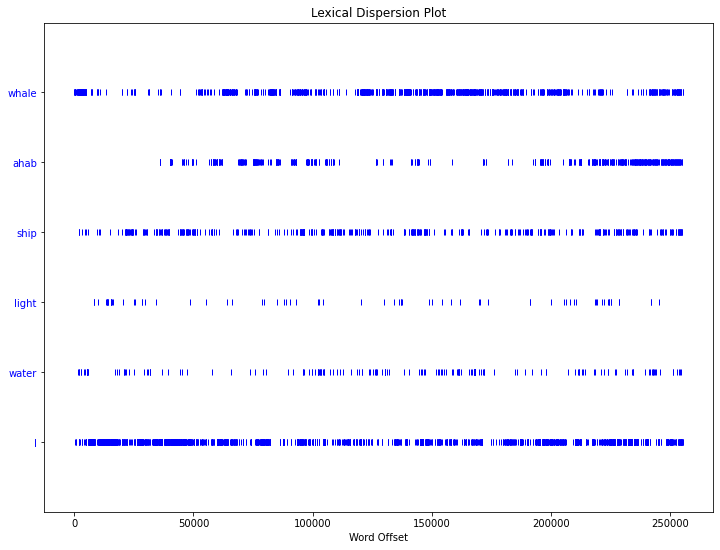

In [ ]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# define the words you want to plot
targets=['whale', 'ahab', 'ship', 'light', 'water', 'I']
#draw the plot
dispersion_plot(word_tokens, targets, ignore_case=True, title='Lexical Dispersion Plot')

# X. Part of Speech (POS) Analysis

We can also do some simple analysis of the distribution of parts of speech in the text.  Note that this is solidly in the camp of Natural Language Processing, since NLTK uses english natural language models to parse the text into sentences, phrases, and finally POS based on the grammatical structure of the english language.

In [ ]:
# First we'll perfor the pos tagging
tagged = nltk.pos_tag(word_tokens)

Now that we've tagged the text for POS, let's take a quick look at the result.

In [ ]:
# look at the first ten POS tagged words
print(tagged[0:10:1])

[('The', 'DT'), ('Project', 'NNP'), ('Gutenberg', 'NNP'), ('EBook', 'NNP'), ('of', 'IN'), ('Moby', 'NNP'), ('Dick', 'NNP'), (';', ':'), ('or', 'CC'), ('The', 'DT')]


<font size="2">note:  a key to the POS tags applied by the NLTK can be found in the appendix at the end of this notebook.

We see in the above that the results of our POS tagging is a list of key/value pairs where the 'key' is the word and the 'value' is the code for the part of speech that the compter has determined for each key.  

Next, we'll extract just the POS tags from the pairs and save them as a list.

In [ ]:
# create a list of just POS tags
pos_list = []
for word, pos in tagged:
  pos_list.append(pos)

Now, let's look at this list to make sure we got it right.

In [ ]:
# first, see how long the list is.  It should be the same length as our 
# original list of words in the text, which we've already calculated above.
print(len(pos_list))

258660


In [ ]:
# Now we'll look at the first ten POS tags in this list to see if
# everything looks right
print(pos_list[0:10:1])

['DT', 'NNP', 'NNP', 'NNP', 'IN', 'NNP', 'NNP', ':', 'CC', 'DT']


Now we'll create a frequency distribution of our POS tags and examine the list.

In [ ]:
# create a frequency distribution of POS
pos_freq_dist = nltk.probability.FreqDist(pos_list)

In [ ]:
# Look at the most frequent POS
print(pos_freq_dist.most_common(n=50))

[('NN', 33214), ('IN', 29059), ('DT', 26221), (',', 19356), ('JJ', 17828), ('RB', 13833), ('PRP', 11671), ('NNS', 10612), ('.', 10334), ('NNP', 10137), ('CC', 9491), ('VBD', 8806), ('VB', 7027), (':', 6136), ('VBN', 5206), ('VBG', 4933), ('PRP$', 4832), ('TO', 4655), ('VBZ', 4320), ('VBP', 3578), ('MD', 2519), ('CD', 1953), ("''", 1829), ('``', 1476), ('POS', 1350), ('WRB', 1205), ('RP', 1148), ('WDT', 1123), ('WP', 1018), ('JJS', 579), ('JJR', 577), ('EX', 560), ('PDT', 496), ('RBR', 343), ('UH', 289), ('(', 235), (')', 235), ('RBS', 198), ('NNPS', 123), ('WP$', 86), ('FW', 63), ('$', 5), ('#', 1)]


And, finally, we'll plot the POS frequncy distribution.

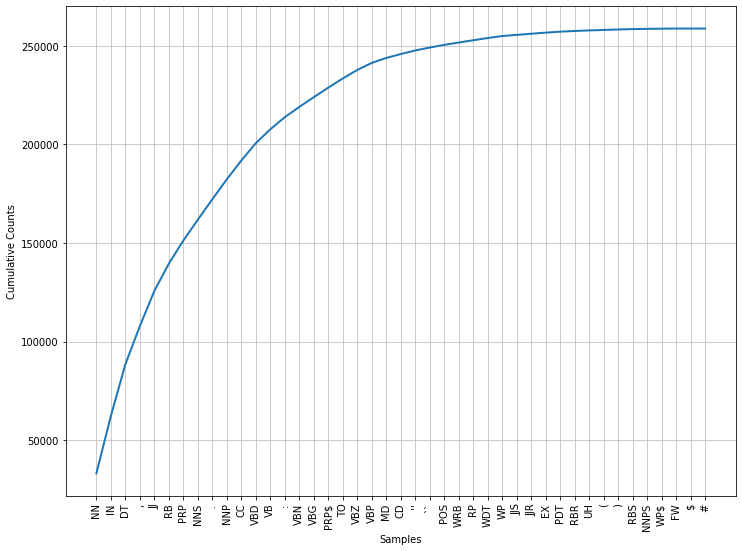

In [ ]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# plot the freqiuency distribution of POS
pos_freq_dist.plot(50, cumulative=True)

We can also do a dispersion plot of parts of speech to see if there are patterns that represent stylistic shifts across the time of the novel.

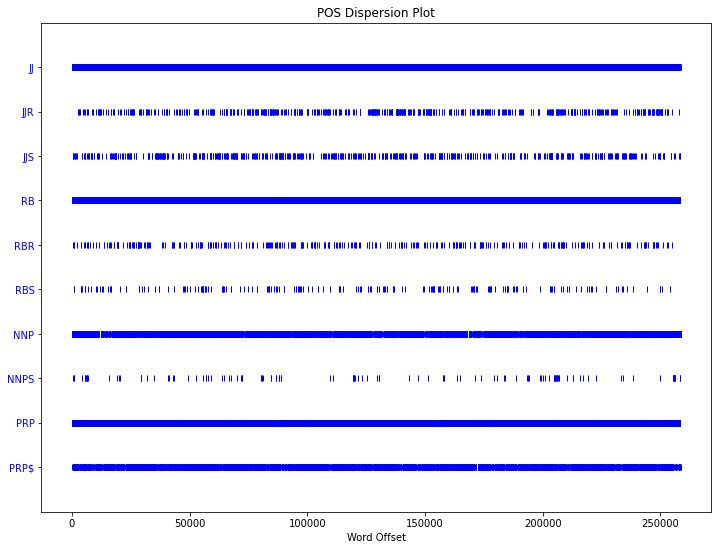

In [ ]:
# set the size of the plot
plt.figure(figsize=(12, 9))
# define the words you want to plot
targets=['JJ', 'JJR', 'JJS', 'RB', 'RBR', 'RBS', 'NNP', 'NNPS', 'PRP', 'PRP$']
#draw the plot
dispersion_plot(pos_list, targets, ignore_case=True, title='POS Dispersion Plot')

# XI.  Wrapping Up

At this point, you've examined the text from a variety of perspectives:  As a text blob (the full text that you originally loaded into the system); as sentences; as words, including some preliminary analysis of the relationshps between workds, and you've delved a bit into the grammatical structure of the text by looking a parts of speech.  

As per the introductory text to section IV, you should make a habbit of taking detailed noted of any trends and/or issues that note in the text while performing your preliminary analysis.  (Hopefully you did this in this instance.). Performing an intial forensic examination of your data and documenting it well is one of the most important, and frequently overlooked, steps in the data/text analysis.  The information that you gain during this forensics is crucuial to making good decisions about what needs to be done to prepare a text for analysis to answer specific scholarly questions about the text.

# Appendix:  NLTK POS Tag Key

The following is a key to the POS tags applied by the NLTK when performing POS tagging.

 
*   CC   | coordinating conjunction
*   CD   | cardinal digit
*   DT   | determiner
*   EX   | existential there (ex: 'there is')
*   FW   | foreign word
*   IN   | preposition/subordinating conjunction
*   JJ   | adjective (ex: big)
*   JJR  | adjective, comparative (ex: bigger)
*   JJS  | adjective, superlative (ex: biggest)
*   LS   | list marker (ex: '1)'
*   MD   | modal (ex: could, will)
*   NN   | noun, singular
*   NNS  | noun plural
*   NNP  | proper noun, singular
*   NNPS | proper noun, plural
*   PDT  | predeterminer (ex: 'all the kids')
*   POS  | possessive ending (ex: Sam's)
*   PRP  | personal pronoun
*   PRP\$ | possessive pronoun 
*   RB   | adverb (ex: very) 
*   RBR  | adverb, comparative (ex: better)
*   RBS  | adverb, superlative (ex: best)
*   RP   | particle 
*   TO   | to (ex: to go 'to' the store.)
*   UH   | interjection 
*   VB   | verb, base form (ex: take)
*   VBD  | verb, past tense (ex: took)
*   VBG  | verb, gerund/present participle (ex: taking)
*   VBN  | verb, past participle (ex: taken)
*   VBP  | verb, sing. present, non-3d (ex: take)
*   VBZ  | verb, 3rd person sing. present (ex: takes)
*   WDT  | wh-determiner (ex: which)
*   WP   | wh-pronoun (ex: who, what)
*   WP\$  | possessive wh-pronoun (ex: whose)
*   WRB  | wh-abverb (ex: where, when)

Chunking

In [ ]:
# First we will try to extract all Noun Phrases (NP) from the text.
# We do this by defining a pattern labeled 'NP' that traverses our 
# word list and looks for an optional Delimiter (DT), followed by 
# any number of adjectives(JJ), and then a noun (NN).
pattern = 'NP: {<DT>?<JJ>*<NN>}'

# Next we create a chunk parser that will traverse our our word list
# looking for the identified pattern.
cp = nltk.RegexpParser(pattern)

In [ ]:
# Now we run the chunk parser on our tagged wordlist
np_chunks = cp.parse(tagged)

In [ ]:
np_chunks.draw()

TclError: ignored

In [ ]:
# look at the output of our chunking
print(np_chunks)

In [ ]:
# Use Inside-Outside-Beginning (IOB) tags to represent the
# hierarchical structure of the chuncked text.
iob_tagged = tree2conlltags(np_chunks)

In [ ]:
# look at the output of our IOB tagging.
print(iob_tagged)

Named Entity Extraction

In [ ]:
# instanitate an nlp object
nlp = en_core_web_sm.load()

In [ ]:
# set the max length of the nlp parser
nlp.max_length = 1200000

# perform nlp tagging of text
nlp_tagged_document = nlp(working_text)

In [ ]:
# print the found entity list
pprint([(X.text, X.label_) for X in nlp_tagged_document.ents])

In [ ]:
# render the document showing NER
displacy.render(nlp_tagged_document, jupyter=True, style='ent')

NLTK version of entity extraction

In [ ]:
# use the nltk.ne_chunk() function to tag named entities
named_entity_tree = nltk.ne_chunk(tagged)

In [ ]:
print(named_entity_tree)

(S
  (ORGANIZATION MOBY/NNP)
  (GPE DICK/NNP)
  ;/:
  OR/CC
  (ORGANIZATION THE/DT WHALE/NNP By/IN Herman/NNP Melville/NNP)
  CHAPTER/NNP
  1/CD
  ./.
  Loomings/NNS
  ./.
  Call/VB
  me/PRP
  (GPE Ishmael/NNP)
  ./.
  Some/DT
  years/NNS
  ago/RB
  --/:
  never/RB
  mind/VB
  how/WRB
  long/JJ
  precisely/RB
  --/:
  having/VBG
  little/JJ
  or/CC
  no/DT
  money/NN
  in/IN
  my/PRP$
  purse/NN
  ,/,
  and/CC
  nothing/NN
  particular/JJ
  to/TO
  interest/NN
  me/PRP
  on/IN
  shore/NN
  ,/,
  I/PRP
  thought/VBD
  I/PRP
  would/MD
  sail/VB
  about/IN
  a/DT
  little/JJ
  and/CC
  see/VB
  the/DT
  watery/JJ
  part/NN
  of/IN
  the/DT
  world/NN
  ./.
  It/PRP
  is/VBZ
  a/DT
  way/NN
  I/PRP
  have/VBP
  of/IN
  driving/VBG
  off/RP
  the/DT
  spleen/NN
  and/CC
  regulating/VBG
  the/DT
  circulation/NN
  ./.
  Whenever/WRB
  I/PRP
  find/VBP
  myself/PRP
  growing/VBG
  grim/JJ
  about/IN
  the/DT
  mouth/NN
  ;/:
  whenever/WRB
  it/PRP
  is/VBZ
  a/DT
  damp/NN
  ,/,
  drizzly/

Testing

In [ ]:
from nltk.draw.dispersion import dispersion_plot
import matplotlib.pyplot as plt


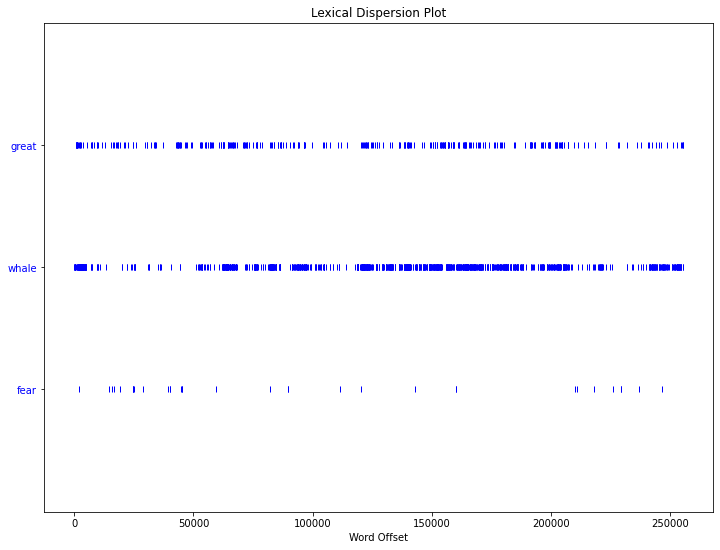

In [ ]:
# the following command can be used to increase the size of the plot using width and hight specifications
plt.figure(figsize=(12, 9))
targets=['great','whale','fear']
dispersion_plot(word_tokens, targets, ignore_case=True, title='Lexical Dispersion Plot')

In [ ]:
pos_list

['DT',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 ':',
 'CC',
 'DT',
 'NNP',
 ',',
 'IN',
 'NNP',
 'NNP',
 'DT',
 'NN',
 'VBZ',
 'IN',
 'DT',
 'NN',
 'IN',
 'NN',
 'RB',
 'IN',
 'DT',
 'NN',
 'CC',
 'IN',
 'RB',
 'DT',
 'NNS',
 'RB',
 '.',
 'PRP',
 'MD',
 'VB',
 'PRP',
 ',',
 'VB',
 'PRP',
 'RB',
 'CC',
 'VB',
 'PRP',
 'IN',
 'DT',
 'NNS',
 'IN',
 'DT',
 'NNP',
 'NNP',
 'NNP',
 'VBD',
 'IN',
 'DT',
 'NN',
 'CC',
 'NN',
 'IN',
 'JJ',
 'NN',
 ':',
 'NNP',
 'NNP',
 ':',
 'CC',
 'DT',
 'JJ',
 'NN',
 ':',
 'NNP',
 'NNP',
 'JJ',
 'VBD',
 ':',
 'NNP',
 'CD',
 ',',
 'CD',
 'VBG',
 'NNP',
 ':',
 'NNP',
 'CD',
 ',',
 'CD',
 'NNP',
 'NNP',
 '#',
 'CD',
 'NN',
 'NNP',
 'NNP',
 ':',
 'NNP',
 ',',
 'CD',
 'NN',
 ':',
 'JJ',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 ':',
 'CC',
 'VB',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'CC',
 'NNP',
 'NNP',
 'NNP',
 ':',
 'CC',
 'DT',
 'NNP',
 'IN',
 'NNP',
 'NNP',
 'NNP',
 'NNP',
 'POS',
 'NNS',
 ':',
 'DT',
 'NN',
 'V

In [ ]:
freq_dist


In [ ]:
bigram_list

In [ ]:
bigram_counts

In [ ]:
distribution = nltk.text.FreqDist(working)

In [ ]:
print(np_chunks)

(S
  MOBY/NNP
  DICK/NNP
  ;/:
  OR/CC
  THE/DT
  WHALE/NNP
  By/IN
  Herman/NNP
  Melville/NNP
  CHAPTER/NNP
  1/CD
  ./.
  Loomings/NNS
  ./.
  Call/VB
  me/PRP
  Ishmael/NNP
  ./.
  Some/DT
  years/NNS
  ago/RB
  --/:
  never/RB
  mind/VB
  how/WRB
  long/JJ
  precisely/RB
  --/:
  having/VBG
  little/JJ
  or/CC
  (NP no/DT money/NN)
  in/IN
  my/PRP$
  (NP purse/NN)
  ,/,
  and/CC
  (NP nothing/NN)
  particular/JJ
  to/TO
  (NP interest/NN)
  me/PRP
  on/IN
  (NP shore/NN)
  ,/,
  I/PRP
  thought/VBD
  I/PRP
  would/MD
  sail/VB
  about/IN
  a/DT
  little/JJ
  and/CC
  see/VB
  (NP the/DT watery/JJ part/NN)
  of/IN
  (NP the/DT world/NN)
  ./.
  It/PRP
  is/VBZ
  (NP a/DT way/NN)
  I/PRP
  have/VBP
  of/IN
  driving/VBG
  off/RP
  (NP the/DT spleen/NN)
  and/CC
  regulating/VBG
  (NP the/DT circulation/NN)
  ./.
  Whenever/WRB
  I/PRP
  find/VBP
  myself/PRP
  growing/VBG
  grim/JJ
  about/IN
  (NP the/DT mouth/NN)
  ;/:
  whenever/WRB
  it/PRP
  is/VBZ
  (NP a/DT damp/NN)
  ,/,
  